In [1]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt


class LinearRegression(d2l.Module):  # @save
  """The linear regression model implemented with high-level APIs."""

  def __init__(self, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.LazyLinear(1)
    self.net.weight.data.normal_(0, 0.01)
    self.net.bias.data.fill_(0)

  def forward(self, X):
    return self.net(X)

  def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

  def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

# 3.5.6. Exercises


##### 1. How would you need to change the learning rate if you replace the aggregate loss over the minibatch with an average over the loss on the minibatch?

**如果将小批量上的总损失替换为小批量上损失的平均值，您需要如何调整学习率？**


答：由于 `LOSS_SUM = N * LOSS_AVERAGE`，梯度被放大了 `N` 倍。我们需要将学习率缩小到其 `1/N`。让我们通过代码来实现。我们首先使用平均损失，学习率为 `0.03`：


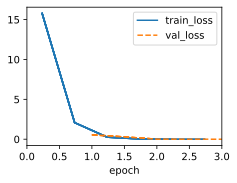

In [2]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

然后我们通过在 `nn.MSELoss()` 中设置参数 `reduction` 来使用总损失。如果我们使用相同的学习率`0.03`，结果是：


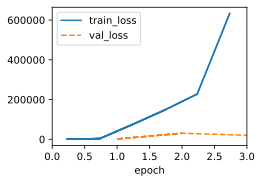

In [3]:
class LinearRegression1(d2l.Module):  # @save
  """The linear regression model implemented with high-level APIs."""

  def __init__(self, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.LazyLinear(1)
    self.net.weight.data.normal_(0, 0.01)
    self.net.bias.data.fill_(0)

  def forward(self, X):
    return self.net(X)

  def loss(self, y_hat, y):
    fn = nn.MSELoss(reduction="sum")
    return fn(y_hat, y)

  def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)


model = LinearRegression1(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

我们可以看到训练损失更大并且下降更快。如果我们将学习率改为 `0.03 / 32 = 0.0009`，结果变得正常。


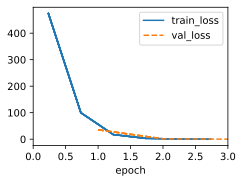

In [4]:
class LinearRegression2(d2l.Module):  # @save
  """The linear regression model implemented with high-level APIs."""

  def __init__(self, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.LazyLinear(1)
    self.net.weight.data.normal_(0, 0.01)
    self.net.bias.data.fill_(0)

  def forward(self, X):
    return self.net(X)

  def loss(self, y_hat, y):
    fn = nn.MSELoss(reduction="sum")
    return fn(y_hat, y)

  def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)


model = LinearRegression2(lr=0.0009)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

##### 2. Review the framework documentation to see which loss functions are provided. In particular, replace the squared loss with Huber's robust loss function. That is, use the loss function

$$l(y,y') = \begin{cases}|y-y'| -\frac{\sigma}{2} & \textrm{ if } |y-y'| > \sigma \\ \frac{1}{2 \sigma} (y-y')^2 & \textrm{ otherwise}\end{cases}$$

**查看框架文档以了解提供了哪些损失函数。特别是，将平方损失替换为 Huber 的鲁棒损失函数。也就是说，使用损失函数**


答：Pytorch 提供了许多损失函数，例如平均绝对误差损失、均方损失、交叉熵损失。请查看此 [链接](https://pytorch.org/docs/stable/nn.html#loss-functions)。该函数需要迭代更多次才能收敛。


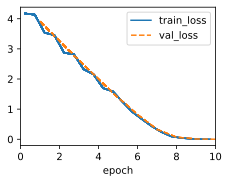

In [5]:
class LinearRegression3(d2l.Module):  # @save
  """The linear regression model implemented with high-level APIs."""

  def __init__(self, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.LazyLinear(1)
    self.net.weight.data.normal_(0, 0.01)
    self.net.bias.data.fill_(0)

  def forward(self, X):
    return self.net(X)

  def loss(self, y_hat, y):
    fn = nn.HuberLoss()
    return fn(y_hat, y)

  def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)


model = LinearRegression3(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

##### 3. How do you access the gradient of the weights of the model?

**如何访问模型权重的梯度？**


答：使用 `model.net.weight.grad` 和 `model.net.bias.grad`


(tensor([[-0.0201,  0.0117]]), tensor([-0.0231]))

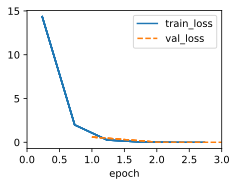

In [6]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)
model.net.weight.grad, model.net.bias.grad

##### 4. What is the effect on the solution if you change the learning rate and the number of epochs? Does it keep on improving?

**如果你改变学习率和训练轮数，对解决方案有什么影响？它会持续改善吗？**


答：如果学习率太小，模型参数的更新步伐会很小。达到最优解需要更多的轮次。如果学习率太大，步伐会过大，可能导致错误的更新。使用适当的学习率，损失函数会随着轮次的增加而减少，直到收敛。

改变学习率


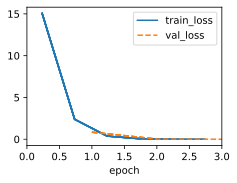

In [7]:
# (1)lr=0.03

model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

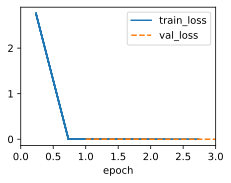

In [8]:
# (2) lr=0.3:

model = LinearRegression(lr=0.3)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

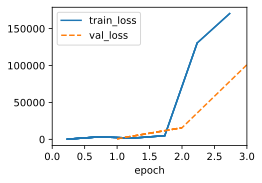

In [9]:
# (3) lr=1:

model = LinearRegression(lr=1)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

更改训练轮数


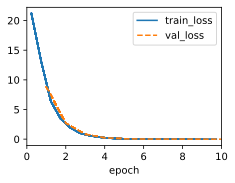

In [10]:
# lr=0.01, epochs=10

model = LinearRegression(lr=0.01)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

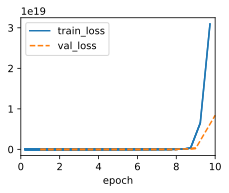

In [11]:
# lr=1, epochs=10

model = LinearRegression(lr=1)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

##### 5. How does the solution change as you vary the amount of data generated?

1. Plot the estimation error for $\hat{\mathbf{w}} - \mathbf{w}$ and $\hat{b} - b$ as a function of the amount of data. Hint: increase the amount of data logarithmically rather than linearly, i.e., 5, 10, 20, 50, ..., 10,000 rather than 1000, 2000, ..., 10,000.
2. Why is the suggestion in the hint appropriate?

**当您改变生成的数据量时，解决方案如何变化？**

1. 绘制 $\hat{\mathbf{w}} - \mathbf{w}$ 和 $\hat{b} - b$ 的估计误差作为数据量的函数。提示：以对数方式增加数据量，而不是线性增加，即使用 5, 10, 20, 50, ..., 10,000，而不是 1000, 2000, ..., 10,000。
2. 为什么提示中的建议是合适的？

参考: <https://pandalab.me/archives/concise_implementaion_of_lr>


答：

1.


Logarithmic Growth Sequence: [5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560]


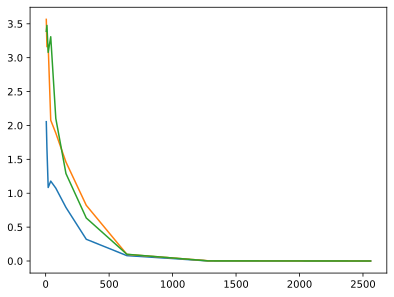

In [12]:
@d2l.add_to_class(LinearRegression)  # @save
def training_step(self, batch):
  return self.loss(self(*batch[:-1]), batch[-1])


@d2l.add_to_class(LinearRegression)  # @save
def validation_step(self, batch):
  return self.loss(self(*batch[:-1]), batch[-1])


# 函数生成合成数据，创建线性回归模型并训练，最后计算模型参数与真实参数之间的偏差。
def stat_bias(n):
  w = torch.tensor([2, -3.4])
  b = torch.tensor([4])
  data = d2l.SyntheticRegressionData(
    w=torch.tensor([2, -3.4]), b=torch.tensor([4]), num_train=n, num_val=n
  )
  model = LinearRegression(lr=0.03)
  trainer = d2l.Trainer(max_epochs=3)
  trainer.fit(model, data)
  bias_w = torch.abs(w - model.net.weight).detach().numpy()
  bias_b = torch.abs(b - model.net.bias).detach().numpy().reshape(1, -1)
  return np.concatenate([bias_w, bias_b], axis=1)


initial_value = 5
growth_factor = 2
num_elements = 10

# 列表生成一个对数增长的序列，用于不同的训练样本数量
nums = [initial_value * growth_factor**i for i in range(num_elements)]
print("Logarithmic Growth Sequence:", nums)

bias = np.empty((1, 3), dtype=float)

for i in range(len(nums)):
  temp = stat_bias(nums[i])
  bias = np.concatenate([bias, temp], axis=0)

for i in range(3):
  plt.plot(nums[:], bias[1:, i], label=i)

plt.show()

2. 这是因为相同数量数据的增益随着数据总量的增加而减少。
